## Communicate Data Findings Project - Ford GoBike System Data

### Table of Contents

- [Introduction](#Introduction)
- [Data Wrangling](#Data_Wrangling)
    - [Gather](#Gather)
    - [Access](#Access)
    - [Clean](#Clean)
- [Univariate Exploration](#Univariate)
- [Bivariate Exploration](#Bivariate)
- [Multivariate Exploration](#Multivariate)
- [Conclusion](#Conclusion)



<a id='Introduction'></a>
### Introduction

Ford GoBike(Lyft) is a bike rental company where consumers can search and find bike share anywhere and sign-up for riding rewards. 

The dataset used for Exploration is from "https://www.lyft.com/bikes/bay-wheels/system-data" for the year 2019.
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

The dataset contains the below details from the bikeshare dataset for each trip.

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

<a id='Data_Wrangling'></a>
### Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob as gb
import os

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='Gather'></a>
#### Gather

In [2]:
#Get data from all the downloaded files obtained from Go Ford website.
trip_files = gb.glob(os.path.join('Data', '*.csv'))
df_trip = pd.concat([pd.read_csv(f, low_memory=False) for f in trip_files], ignore_index=True)
df_trip.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


<a id='Access'></a>
#### Access

- The dataset contains data for each bike rental, below is a brief description,


|  | |
|:-------------|:-------------------------------------------|
|   duration_sec | The duration of bike rental in seconds.   |
|   start_time, end_time | The start/end time of the bike rental. This includes the date and time. |
|   start_station_id, end_station_id  | The station id where the bike was rented / returned. |
|   start_station_name, end_station_name  | The station name where the bike was rented / returned. |
|   start_station_latitude, end_station_latitude  | The latitude of the start / end station. |
|   start_station_logitude, end_station_logitude  | The longitude of the start / end station. |
|   bike_id  | The id of the bike that was rented. |
|   user_type  | The type of user, Customer/Subscriber. |
|   bike_share_for_all_trip  | Discount available for residents under some conditions. |
|   rental_access_method  | The method used to rent a bike. app/clipper.|


- The most interesting feature to explore will be the time when rental traffic is very high. 

- The start_time, user_type and duration_sec are the key columns which will help us explore the bike rental traffic.

In [3]:
df_trip.sample(25)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
314668,965,2019-02-11 11:12:40.2010,2019-02-11 11:28:45.3260,237.0,Fruitvale BART Station,37.775232,-122.224498,225.0,23rd Ave at Foothill Blvd,37.785191,-122.234382,5429,Customer,No,NaN
388806,323,2019-03-30 08:25:35.2280,2019-03-30 08:30:58.4720,114.0,Rhode Island St at 17th St,37.764478,-122.402570,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,5416,Subscriber,No,NaN
1728439,1090,2019-09-28 14:31:18.8560,2019-09-28 14:49:29.7980,365.0,Turk St at Fillmore St,37.780450,-122.431946,120.0,Mission Dolores Park,37.761420,-122.426435,12452,Customer,No,NaN
725181,628,2019-04-16 15:29:54.8030,2019-04-16 15:40:23.3920,102.0,Irwin St at 8th St,37.766883,-122.399579,58.0,Market St at 10th St,37.776619,-122.417385,3603,Subscriber,No,NaN
386027,505,2019-03-30 14:30:25.9540,2019-03-30 14:38:51.3780,109.0,17th St at Valencia St,37.763316,-122.421904,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,5029,Customer,No,NaN
2147079,1933,2019-10-03 17:03:20.9300,2019-10-03 17:35:34.5470,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,499,Customer,No,NaN
1703747,1247,2019-08-02 10:27:23.5130,2019-08-02 10:48:10.8150,130.0,22nd St Caltrain Station,37.757704,-122.391885,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1003,Subscriber,No,NaN
1958058,564,2019-10-28 19:00:27.9900,2019-10-28 19:09:52.7010,66.0,3rd St at Townsend St,37.778742,-122.392741,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,9940,Customer,No,NaN
13467,1487,2019-01-30 15:27:05.8830,2019-01-30 15:51:53.7080,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2230,Customer,No,NaN
2452229,1355,2019-12-06 08:56:44.0300,2019-12-06 09:19:19.3130,375.0,Grove St at Masonic Ave,37.774836,-122.446546,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,11277,Customer,NaN,NaN


In [4]:
df_trip.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  float64
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  float64
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  bike_id                  2506983 non-null  int64  
 12  user_type                2506983 non-null  object 
 13  bike_share_for_all_trip  2263724 non-null 

In [5]:
df_trip.duplicated().sum() #No duplicates if result is 0.

0

In [6]:
(df_trip['rental_access_method'].isnull().sum() * 100) / 2506983

95.179943382145

In [7]:
df_trip[~df_trip['rental_access_method'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
1240946,511,2019-06-20 19:08:25,2019-06-20 19:16:57,NaN,NaN,37.290060,-121.880718,NaN,NaN,37.300379,-121.880062,773766,Customer,NaN,app
1240947,592,2019-06-21 13:44:35,2019-06-21 13:54:27,NaN,NaN,37.291543,-121.879600,NaN,NaN,37.313545,-121.888996,630873,Customer,NaN,app
1240948,1648,2019-06-20 21:21:27,2019-06-20 21:48:55,NaN,NaN,37.293723,-121.911107,NaN,NaN,37.296621,-121.913400,205087,Customer,NaN,app
1240949,1074,2019-06-25 11:31:45,2019-06-25 11:49:39,NaN,NaN,37.293870,-121.906131,NaN,NaN,37.310521,-121.887427,189672,Customer,NaN,app
1240950,1646,2019-06-21 15:23:48,2019-06-21 15:51:15,NaN,NaN,37.294886,-121.908596,NaN,NaN,37.314102,-121.890535,455816,Subscriber,NaN,app
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506978,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,NaN,app
2506979,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,NaN,app
2506980,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,NaN,app
2506981,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,NaN,app


In [8]:
df_trip[(df_trip['rental_access_method'].isnull() | df_trip['start_station_id'].isnull() | df_trip['start_station_name'].isnull() | df_trip['end_station_id'].isnull() | df_trip['end_station_name'].isnull() | df_trip['bike_share_for_all_trip'].isnull())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506978,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,NaN,app
2506979,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,NaN,app
2506980,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,NaN,app
2506981,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,NaN,app


<a id='Access_Summary'></a>
#### Access Summary

#### Quality
- Inappropriate Data types
    - start_time and end_time should be of type datetime.
    - bike_id,start_station_id and end_station_id should be of type object.
    - usertype, rental_access_method, bike_share_for_all_trip should be of type category.
- Columns with missing/NaN values
    - start_station_id, start_station_name, end_station_id, end_station_name, bike_share_for_all_trip, rental_access_method have null values.
    - rental_access_method has values for only 120838 rows. 95% of values are not available. This feature was introduced mid-year.
    - deleting null values in the remaining rows will lead to losing 2 lakh+ rows of data. Hence we can retain the null value rows.

<a id='Clean'></a>
#### Clean

Create a copy of the data for cleaning, also save the data to a csv file.

In [9]:
df_trip_copy = df_trip.copy()

#### Define

- Convert the columns with Inappropriate Data types.
    - to_datetime for start_date and end_date.
    - as_type() for start_station_id, end_station_id, user_type, rental_access_method, bike_share_for_all_trip.

#### Code

In [10]:
#start_time and end_time should be of type datetime.
df_trip_copy['start_time'] = pd.to_datetime(df_trip_copy['start_time'])
df_trip_copy['end_time'] = pd.to_datetime(df_trip_copy['end_time'])

#start_station_id and end_station_id should be a string.
df_trip_copy['bike_id'] = df_trip_copy['bike_id'].astype('str')
df_trip_copy.start_station_id = df_trip_copy[df_trip_copy.start_station_id.notnull()].start_station_id.astype(int).astype('str')
df_trip_copy.end_station_id = df_trip_copy[df_trip_copy.end_station_id.notnull()].end_station_id.astype(int).astype('str')

# usertype, rental_access_method, bike_share_for_all_trip should be of type category.
df_trip_copy['user_type'] = df_trip_copy['user_type'].astype('category')
df_trip_copy['rental_access_method'] = df_trip_copy['rental_access_method'].astype('category')
df_trip_copy['bike_share_for_all_trip'] = df_trip_copy['bike_share_for_all_trip'].astype('category')

#### Test

In [11]:
df_trip_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,134,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,37.870139,-122.268422,157,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,37.770083,-122.429156,53,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,37.794130,-122.394430,28,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [12]:
df_trip_copy.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2506983 non-null  int64         
 1   start_time               2506983 non-null  datetime64[ns]
 2   end_time                 2506983 non-null  datetime64[ns]
 3   start_station_id         2426249 non-null  object        
 4   start_station_name       2426850 non-null  object        
 5   start_station_latitude   2506983 non-null  float64       
 6   start_station_longitude  2506983 non-null  float64       
 7   end_station_id           2424081 non-null  object        
 8   end_station_name         2424633 non-null  object        
 9   end_station_latitude     2506983 non-null  float64       
 10  end_station_longitude    2506983 non-null  float64       
 11  bike_id                  2506983 non-null  object        
 12  

In [13]:
df_trip.to_csv('2019-fordgobike-tripdata.csv', index=False)

### Exploration with Visuals

To investigate let's explore the questions below,

- When is the traffic of bike rentals maximum?
- Do bike rentals depend on user types?
- At what time of day, week or month is the bike rental maximum?

We can explore visuals using the start_time and user_type. They should provide further insights to our exploration.
Also, the user type will allow us to look at the bike rental trends by each kind of user(Customer/Subscriber).

<a id='Univariate'></a>
### Univariate Exploration

In this section, we will investigate individual variables by using the visualizations.

We will explore the average time of a bike rental. We will also check the frequency of bike rentals by month, week, weekday and time of day. This will help us to understand when we can expect high requests for bike rentals.

In [14]:
df_trip_copy.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,3.776506e+01,-1.223499e+02,3.776422e+01,-1.223459e+02
std,1.974714e+03,1.363698e-01,3.089648e-01,2.392885e-01,7.080417e-01
min,6.000000e+01,0.000000e+00,-1.225143e+02,0.000000e+00,-1.225143e+02
25%,3.590000e+02,3.776931e+01,-1.224130e+02,3.777003e+01,-1.224117e+02
50%,5.710000e+02,3.778053e+01,-1.223983e+02,3.778076e+01,-1.223981e+02
75%,8.870000e+02,3.779539e+01,-1.222914e+02,3.779587e+01,-1.222934e+02
max,9.121100e+05,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00


Text(0, 0.5, 'Number of Bike Trips')

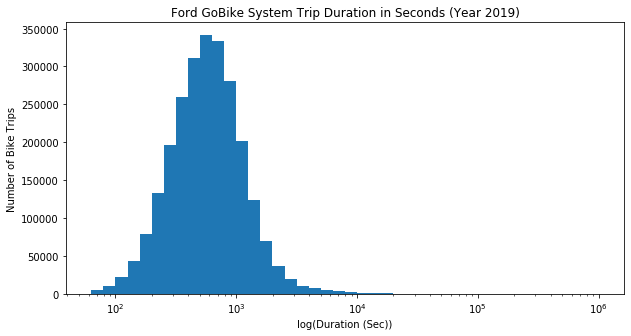

In [15]:
# Univariate Exploration of bike rentals by duration(in seconds).

bin_edges = 10 ** np.arange(1.8, np.log10(df_trip_copy['duration_sec'].max())+0.08, 0.1)
plt.figure(figsize = [10, 5])
plt.hist(data = df_trip_copy, x='duration_sec', bins = bin_edges)
plt.xscale('log')
plt.title("Ford GoBike System Trip Duration in Seconds (Year 2019)")
plt.xlabel('log(Duration (Sec))')
plt.ylabel('Number of Bike Trips')
#plt.axvline(df_trip_copy['duration_sec'].mean(), color='g', linestyle='dashed', linewidth=1);

From the above distribution we can see, The maximum duration of bike rentals is from 500 to 600 seconds i.e., approximately 8-10 minutes.

In the next step of exploration, let us find the bike rentals by month. This will show the bike rental trend for each month.

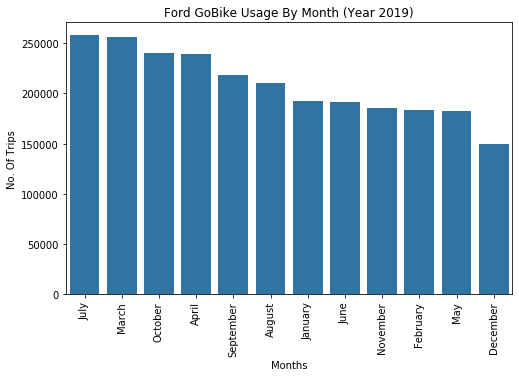

In [16]:
# Univariate Exploration of bike rentals by month.
plt.figure(figsize=(8,5))

base_color = sb.color_palette()[0]
day_type = df_trip_copy.start_time.dt.month_name()
cat_order = day_type.value_counts().index
g = sb.countplot(data = df_trip_copy, x = day_type, color = base_color, order = cat_order)

g.axes.set_xlabel('Months')
g.axes.set_ylabel('No. Of Trips')
g.set_title('Ford GoBike Usage By Month (Year 2019)')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

From the above histogram we can say, in the year 2019

- Maximum bike rentals were from the month of July and the least was from December.
- We can also see that the 'Winter' months from November through February sees a similar trend. They fall on the lower side of the histogram. 
- The bike rentals are mostly used by locals for work or other daily activities. There is a peak in summer (July), early spring (March) and late Fall (October).

In the next step of exploration, let us find the bike rentals by week/weekday. This will show the bike rental trend for each day of a week/weekday.

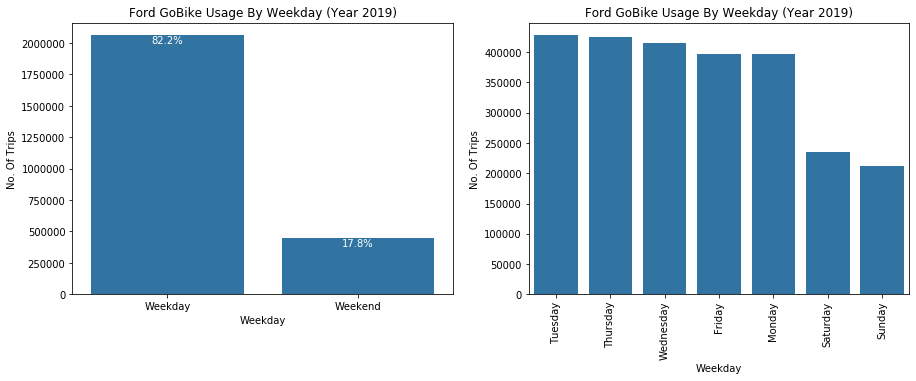

In [17]:
# Univariate Exploration of bike rentals by Week and Weekday.
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
day_type = df_trip_copy.start_time.dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
cat_order = day_type.value_counts().index
g = sb.countplot(data = df_trip_copy, x = day_type, color = base_color, order = cat_order)

g.axes.set_xlabel('Weekday')
g.axes.set_ylabel('No. Of Trips')
g.set_title('Ford GoBike Usage By Weekday (Year 2019)')

n_points = df_trip_copy.shape[0]
cat_counts = day_type.value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-6, pct_string, ha = 'center', va='top', color = 'w')
    
    
plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
day_type = df_trip_copy.start_time.dt.day_name()
cat_order = day_type.value_counts().index
g = sb.countplot(data = df_trip_copy, x = day_type, color = base_color, order = cat_order)

g.axes.set_xlabel('Weekday')
g.axes.set_ylabel('No. Of Trips')
g.set_title('Ford GoBike Usage By Weekday (Year 2019)')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

The bike rentals on weekdays i.e., Monday through Friday is more compared to the Weekends i.e., Saturday and Sunday.
82.2% of bike rentals are for weekdays, This also says most of the bike rentals are for work and daily activities.

Now let's find the frequency of bike rentals by the Time of Day (Early Morning, Morning, Afternoon, Evening, Night and Late Night). 

In [18]:
def TimeOfDay(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Afternoon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

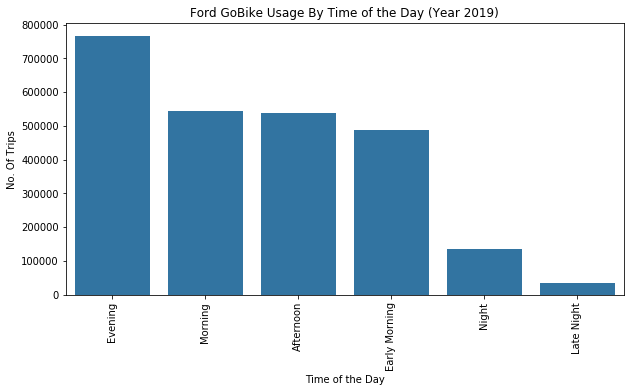

In [19]:
# Univariate Exploration of bike rentals by Time of Day.

plt.figure(figsize=(10,5))
base_color = sb.color_palette()[0]
day_type = df_trip_copy.start_time.dt.hour.apply(TimeOfDay)
cat_order = day_type.value_counts().index
g = sb.countplot(data = df_trip_copy, x = day_type, color = base_color, order = cat_order)

g.axes.set_xlabel('Time of the Day')
g.axes.set_ylabel('No. Of Trips')
g.set_title('Ford GoBike Usage By Time of the Day (Year 2019)')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

The frequency of bike rentals are more in the Evening followed by Morning. This also points out that the bike rentals are for work and daily activities.

#### Observations


The following can be summarized on univariate exploration of the data,

- The maximum duration of bike rentals is from 8 to 10 minutes.
- July, March and October are months with most bike rentals.
- The bike rentals on Weekday are extremely high on weekdays (82.2%) compared to weekends(17.8%).
- Evenings/Mornings are the times when there are more number of bike rentals.

From the above observations, we can say that most of the bike rentals are used by locals. The maximum bike rentals are in the Evening/Morning and are on Weekdays, this further indicates it is used for work or daily activities and less for leisure/travel. 

<a id='Bivariate'></a>
### Bivariate Exploration

In this section, we will investigate two variables by using the visualizations.

We will explore the average time of a bike rental by User type. We will also check the frequency of bike rentals by month, week, weekday and time of day and by which type of user. A comparison will be done to study the bike rentals by user type. Here we have two user types, The Customer and the Subscriber. A Customer is someone who takes a casual bike rental and a Subscriber is someone who takes a bike rental with a Membership.

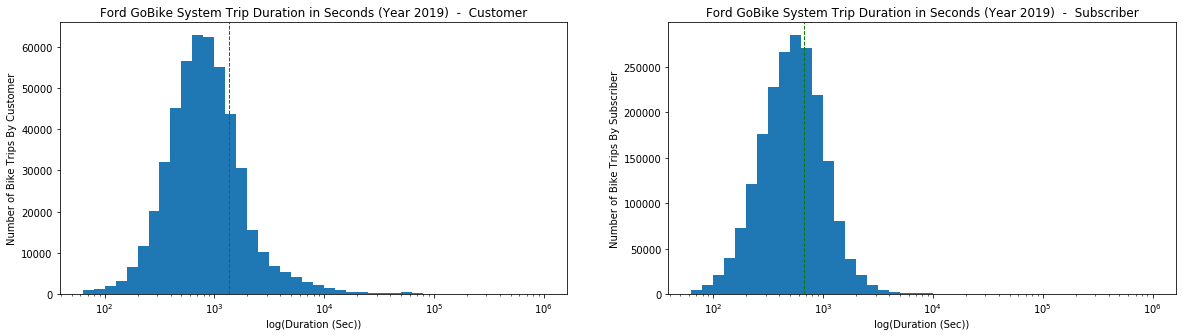

In [20]:
# Univariate Exploration of bike rentals by duration(in seconds).
df_trip_copy_C = df_trip_copy[df_trip_copy['user_type'] == 'Customer']
df_trip_copy_S = df_trip_copy[df_trip_copy['user_type'] == 'Subscriber']
bin_edges = 10 ** np.arange(1.8, np.log10(df_trip_copy['duration_sec'].max())+0.08, 0.1)

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.hist(data = df_trip_copy_C, x='duration_sec', bins = bin_edges)
plt.xscale('log')
plt.title("Ford GoBike System Trip Duration in Seconds (Year 2019)  -  Customer")
plt.xlabel('log(Duration (Sec))')
plt.ylabel('Number of Bike Trips By Customer')
plt.axvline(df_trip_copy_C['duration_sec'].mean(), color='g', linestyle='dashed', linewidth=1)

plt.subplot(1, 2, 2)
plt.hist(data = df_trip_copy_S, x='duration_sec', bins = bin_edges)
plt.xscale('log')
plt.title("Ford GoBike System Trip Duration in Seconds (Year 2019)  -  Subscriber")
plt.xlabel('log(Duration (Sec))')
plt.ylabel('Number of Bike Trips By Subscriber')
plt.axvline(df_trip_copy_S['duration_sec'].mean(), color='g', linestyle='dashed', linewidth=1);

In [21]:
# For easier analysis let us consider the bike rentals lesser than 1800 seconds i.e., 30 minutes
df_trip_copy_30 = df_trip_copy[df_trip_copy['duration_sec'] <= 1800]

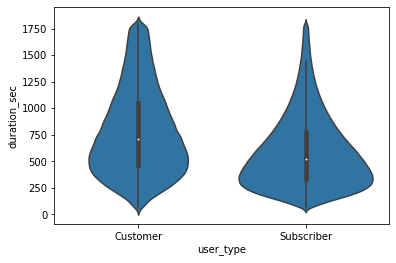

In [22]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df_trip_copy_30, x = 'user_type', y = 'duration_sec', color = base_color);

From the above histograms we can see that the bike rentals by Subscribers are more compared to the Customers. The mean duration of Customer (~ 1500 seconds) is higher than Subscriber (~ 700 seconds). The maximum number of bike rental duration for a Customer is 600 seconds and a Subscriber is 500 seconds.

Similar observations can be made using the violin plots. The maximum number of Subscriber bike rentals belong to the 250-500 seconds and the Customer bike rentals belong to the 400-600 seconds.

In the next step of exploration, let us find the bike rentals by month for each User type. This will show the bike rental trend of each User type for each month.

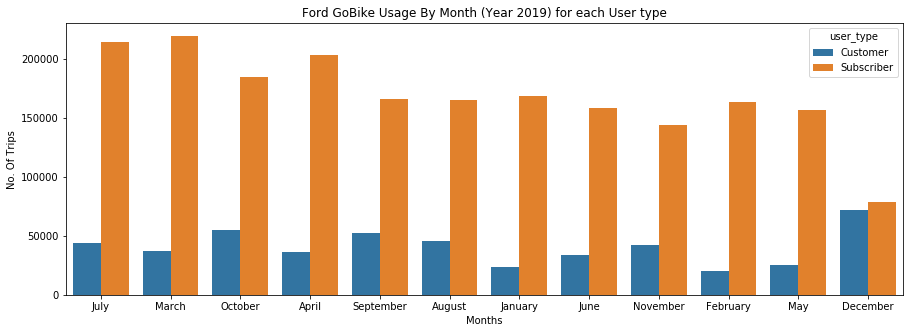

In [23]:
plt.figure(figsize=(15,5))

base_color = sb.color_palette()[0]
day_type = df_trip_copy.start_time.dt.month_name()
cat_order = day_type.value_counts().index
g = sb.countplot(data = df_trip_copy, x = day_type, hue = 'user_type', order=cat_order)
g.axes.set_xlabel('Months')
g.axes.set_ylabel('No. Of Trips')
g.set_title('Ford GoBike Usage By Month (Year 2019) for each User type');

We can see that the bike rentals by Subscribers are more compared to the Customers.

The maximum bike rentals for Customers are in December whereas for Subscribers it is March.

The minimum bike rentals for Customers are in February where as for Subscribers it is December.

In the next step of exploration, let us find the bike rentals by week/weekday for each User type. This will show the bike rental trend for each day of a week/weekday for each User type.

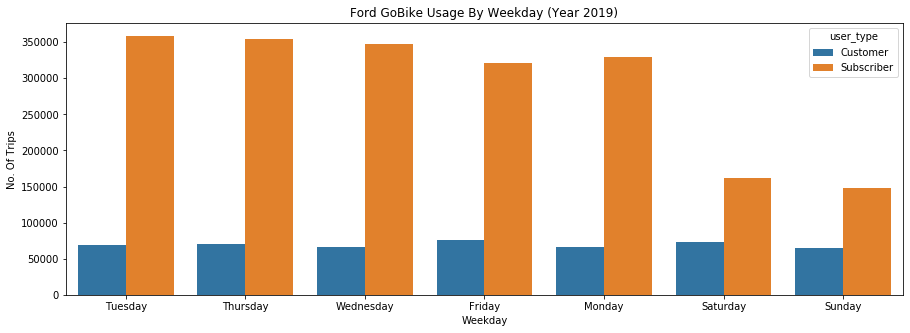

In [24]:
plt.figure(figsize=(15,5))
base_color = sb.color_palette()[0]
day_type = df_trip_copy.start_time.dt.day_name()
cat_order = day_type.value_counts().index
g = sb.countplot(data = df_trip_copy, x = day_type, hue = 'user_type', order=cat_order)
g.axes.set_xlabel('Weekday')
g.axes.set_ylabel('No. Of Trips')
g.set_title('Ford GoBike Usage By Weekday (Year 2019)');

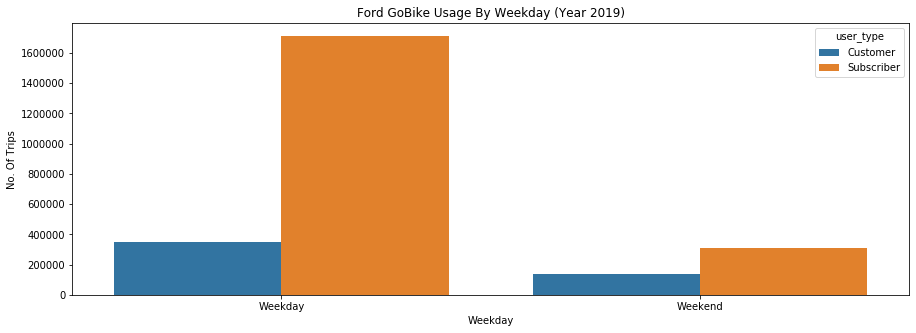

In [25]:
day_type = df_trip_copy.start_time.dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
plt.figure(figsize=(15,5))
base_color = sb.color_palette()[0]
g = sb.countplot(data = df_trip_copy, x = day_type, hue = 'user_type')
g.axes.set_xlabel('Weekday')
g.axes.set_ylabel('No. Of Trips')
g.set_title('Ford GoBike Usage By Weekday (Year 2019)');

We can see that the bike rentals by Subscribers are more compared to the Customers.

The maximum bike rentals for Customers are on Fridays and Saturdays whereas for Subscribers it is Tuesdays and Thursdays.

The minimum bike rentals for Customers are on Wednesdays and Sundays whereas for Subscribers it is Saturdays or Sundays.

Also, it is interesting to observe the bike rentals for both the User types are less in the Weekends compared to the Weekdays.
The Weekend dip for the Customer bike rentals is because their maximum bike rentals are on Fridays and Saturdays and minimum bike rentals are on Sundays.

Now let's find the frequency of bike rentals by the Time of Day (Early Morning, Morning, Afternoon, Evening, Night and Late Night) for each User type.

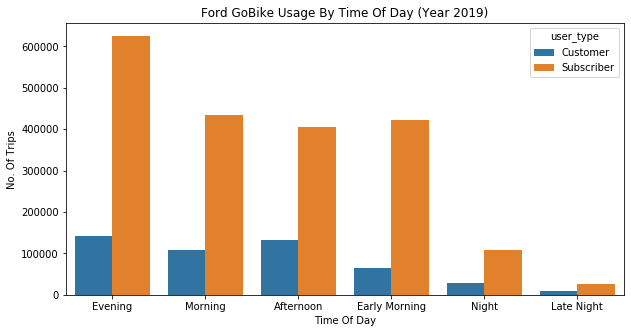

In [26]:
plt.figure(figsize=(10,5))
base_color = sb.color_palette()[0]
day_type = df_trip_copy.start_time.dt.hour.apply(TimeOfDay)
cat_order = day_type.value_counts().index
g = sb.countplot(data = df_trip_copy, x = day_type, hue = 'user_type', order = cat_order)
g.axes.set_xlabel('Time Of Day')
g.axes.set_ylabel('No. Of Trips')
g.set_title('Ford GoBike Usage By Time Of Day (Year 2019)');

We can see that the bike rentals by Subscribers are more compared to the Customers.

The maximum bike rentals for Customers are on the Evenings and Afternoons where as for Subscribers it is in the Evening and Mornings.

The minimum bike rentals for both the User types are at Night and Late Night.

#### Observations

The following can be summarized on Bivariate exploration of the data,

- The maximum duration of bike rentals is ~ 8 minutes for Customers and ~ 10 minutes for Subscribers.
- The maximum bike rentals for Customers are in December where as for Subscribers it is March. The minimum bike rentals for Customers are in February where as for Subscribers it is December.
- The maximum bike rentals for Customers are on Fridays and Saturdays whereas for Subscribers it is Tuesdays and Thursdays. The minimum bike rentals for Customers are on Wednesdays and Sundays whereas for Subscribers it is Saturdays or Sundays.
- The maximum bike rentals for Customers are on the Evenings and Afternoons where as for Subscribers it is in the Evening and Mornings.

From the above observations, we can say that most of the Subscribers are locals and Customers are tourists.

The maximum bike rentals for Customers are in December on Fridays and Saturdays in the Evenings/Afternoon indicating that most of the Customers should be visitors or tourists.

Similarly the maximum bike rentals for Subscribers are high during summers and average in winters. Also the maximum bike rentals are on Weekdays and in the Evenings/Mornings which indicate that the Subscribers should be locals who are using the bike rentals to commute for everyday activities.


<a id='Multivariate'></a>
### Multivariate Exploration

In this section, we will investigate multiple variables by using the visualizations.

We will explore the peak times of bike rentals by weekday and then month for each user type. This will give us an understanding when is the peak time of bike rentals throughout the year, along with the popular times in a week and time of the day.

In [27]:
df_trip_copy_C.loc[:,'timeofday'] = df_trip_copy_C['start_time'].dt.hour.apply(TimeOfDay)
df_trip_copy_C.loc[:,'startweek'] = df_trip_copy_C['start_time'].dt.day_name()
df_trip_copy_C.loc[:,'startmonth'] = df_trip_copy_C['start_time'].dt.month_name()

df_trip_copy_S.loc[:,'timeofday'] = df_trip_copy_S['start_time'].dt.hour.apply(TimeOfDay)
df_trip_copy_S.loc[:,'startweek'] = df_trip_copy_S['start_time'].dt.day_name()
df_trip_copy_S.loc[:,'startmonth'] = df_trip_copy_S['start_time'].dt.month_name()

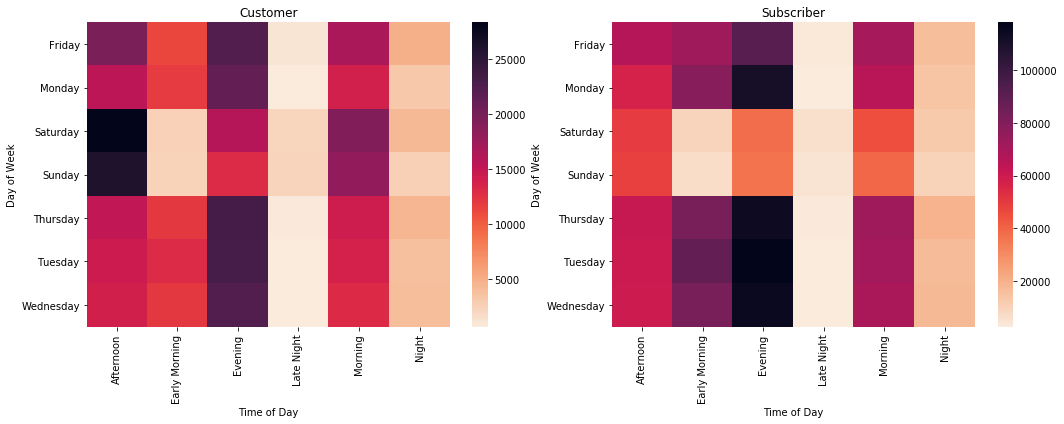

In [28]:
plt.figure(figsize=[15, 6])

plt.subplot(1, 2, 1)
ct_counts = df_trip_copy_C.groupby(['startweek', 'timeofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='startweek', columns='timeofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r')
plt.title('Customer', loc='center')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.subplot(1, 2, 2)
ct_counts = df_trip_copy_S.groupby(['startweek', 'timeofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='startweek', columns='timeofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r')
plt.title('Subscriber', loc='center')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=90)
plt.tight_layout();

The above heatmaps display frequency of bike rentals by week and time of day, for both the user types - Customers and Subscribers.

We can observe the peak time of bike rentals for Customers are Saturdays and Mondays in the Afternoons. Similarly the peak time of bike rentals for Subscribers are on weekdays in the Evenings. This helps us to further conclude that the local people of the bay area use the bike rentals for daily commute. Also, Customers are usually tourists or visitors who use the bike rentals for travel and leisure.

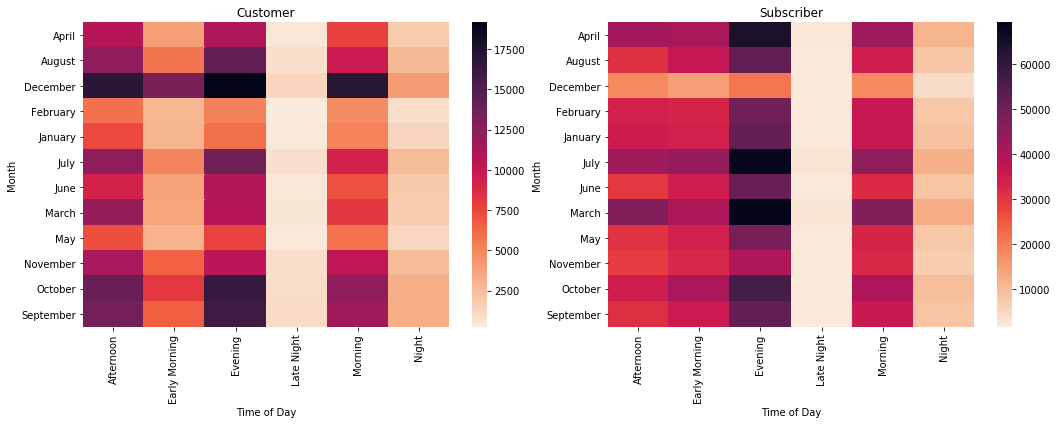

In [29]:
plt.figure(figsize=[15, 6])

plt.subplot(1, 2, 1)
ct_counts = df_trip_copy_C.groupby(['startmonth', 'timeofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='startmonth', columns='timeofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r')
plt.title('Customer', loc='center')
plt.xlabel('Time of Day')
plt.ylabel('Month')
plt.xticks(rotation=90)
plt.tight_layout()

plt.subplot(1, 2, 2)
ct_counts = df_trip_copy_S.groupby(['startmonth', 'timeofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='startmonth', columns='timeofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r')
plt.title('Subscriber', loc='center')
plt.xlabel('Time of Day')
plt.ylabel('Month')
plt.xticks(rotation=90)
plt.tight_layout();

The above heatmaps display frequency of bike rentals by month and time of day, for both the user types - Customers and Subscribers.

We can observe the peak time of bike rentals for Customers in the month of December(Afternoon, Evening and Morning) and September and October(In the evenings). Similarly the peak time of bike rentals for Subscribers are in the months of March, April and July in the Evenings. Also, the Subscribers have a high frequency of bike rentals throughout the year in the evenings. This helps us to further conclude that the local people of the bay area use the bike rentals for daily commute. Also, Customers are usually tourists or visitors who use the bike rentals for travel and leisure especially during Fall and Christmas..

#### Observations

- The bike rentals for customers are high in the month of September, October and December. It is usually high on weekends and in the evenings.
- The bike rentals for subscribers are high in the evenings of weekdays all through the year.

<a id='Conclusion'></a>
### Conclusions

In the exploration process, I wanted to explore the time of maximum bike rentals. Initially I checked for the average time of 
bike rentals using univariate plots then further investigated the time duration of bike rental for different user types(Customer and Subscriber)
using Bivariate plots. The maximum duration of Customer was higher than the subscriber, but the number of subscribers were higher.
In order to find time for maximum bike rentals, we had to traverse further but for different user types.
I have used both univariate and bivariate plots to explore the dataset and find time of maximum bike rentals for both user types.
The plots obtained clearly showed that the subscribers were usually locals using the bike rentals for daily commute. Similarly 
the customers were visitors or tourists using the bike rental for leisure or travel. Additionally, the bike rentals provided membership to locals
and all of them were from subscriber data and none from the customer data.

Finally, I investigated further using multivariate plots to find the time of maximum rentals for both subscribers and customers.
For the dataset used for exploration, the bike rentals for customers were high in the month of September, October and December.
It was usually high on Weekends and in the Evenings. Similarly, for subscribers, the bike rentals were high in the evenings
of weekdays all through the year.